In [1]:
import numpy as np
import csv
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'auto-mpg.csv'
txtfile = 'auto-mpg.txt'

In [3]:
col_names = ['mpg', 'cylinders', 'displacement', 'hoursepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

In [54]:
pandas_data = pd.read_csv(txtfile, header=None, delim_whitespace=True, names=col_names, na_values=['?'])

hp_mean = pandas_data.hoursepower.mean()
weight_mean = pandas_data.weight.mean()

#replace the missing values in hp and weight with the mean of those columns
values = {'hoursepower': hp_mean, 'weight': weight_mean}
pandas_data = pandas_data.fillna(value=values)

In [57]:
#random array between 0 and 1 with same size as the dataset.
#sets true if value is less than 0.8, creating an approximate 80% 20% split.
msk = np.random.rand(len(pandas_data)) < 0.8
#creates the train set
train = pandas_data[msk]
#creates the test set
test = pandas_data[~msk]

In [61]:

# find linear regression weights based on the data columns
weights = norm_function(np.array(train.hoursepower.values), np.array(train.weight.values))
print(weights)

[1041.34706611   18.48321084]


In [38]:
data = []
with open(filename) as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        data.append(row)

In [40]:
## b)

#randomly shuffle the data
random.shuffle(data)

#Calculate the 80% mark for the dataset
cutoff_num = int(len(data) * 0.8)

#grab the first 80% of the randomized data
train_set = data[:cutoff_num]

#grab the ending 20% of the randomized data
test_set = data[-(len(data)-cutoff_num):]

318
80


In [4]:
def init_data(data):
    X = []
    Y = []
    for row in data:
        #row[3] = hourspower, row[4] = weight
        if row[3] != '?' and row[4] != '?':
            X.append(int(row[3]))
            Y.append(int(row[4]))

    X = np.array(X)
    Y = np.array(Y)
    
    return X,Y

In [60]:
## c)

#X and Y are the two given data arrays
def norm_function(X, Y):
    ## normal equation: B = (H^T H)^(-1) H^T z

    #initialize matrix H and z
    H = []
    z = []
    
    #builds matrix H and z from given data arrays X and Y
    for i in range(len(X)):
        H.append(np.array([1, X[i]]))
        z.append(Y[i])

    #turn lists into numpy arrays
    H = np.array(H)
    z = np.array(z)

    # normal function calculations:
    
    # calculates H^T dot H
    hTh = np.transpose(H).dot(H)
    # calculates H^T dot z
    hTz = H.T.dot(z)
    # calculates the rest of the equation: B = (H^T H)^(-1) H^T z
    b = np.linalg.solve(hTh, hTz)
    
    #return the calculated weights b0 and b1
    return b

In [6]:
#Set up data using the variables hoursepower (row[3]) and weight (row[4])
X,Y = init_data(data)

#calculates weights through normal function
B = norm_function(X, Y)
print(B)

[984.50032677  19.07816155]


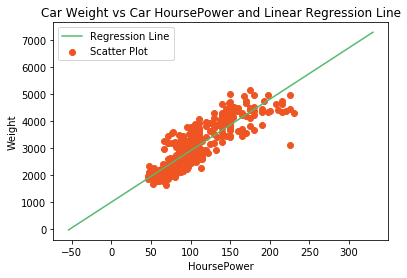

In [7]:
# Plotting Values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = B[0] + B[1] * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('HoursePower')
plt.ylabel('Weight')
plt.title('Car Weight vs Car HoursePower and Linear Regression Line')
plt.legend()
plt.show()

d)

The equeation for the linear model using the variables weight and hoursepower:

$$ weight = B_{0} + B_{1}*hoursepower $$

In [8]:
## e)

def train_model(train_data):
    
    train_hp, train_weight = init_data(train_data)
    
    return norm_function(train_hp, train_weight)

def test_model(test_data, B):

    test_hp, test_weight = init_data(test_data)

    error = []
    for i in range(len(test_hp)):
        #calculate estimated weight from model
        estimate_weight = B[0] + ( B[1] * test_hp[i] )
        
        actual_weight = test_weight[i]
        
        dif = actual_weight - estimate_weight
        error.append(dif)
    
    error = np.array(error)
    
    return error.T.dot(error)

In [9]:
#train the 'train_set' set
trained_weights = train_model(train_set)

#test the trained_weights on 'test_set'
tot_error = test_model(test_set, trained_weights)

print(tot_error)

15648342.224801363
